## Loading the dataset of Sign language

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('C:/Users/Dell/Dropbox/My PC (DESKTOP-QR63AQ6)/Downloads/archive (9)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Dell/Dropbox/My PC (DESKTOP-QR63AQ6)/Downloads/archive (9)\american_sign_language.PNG
C:/Users/Dell/Dropbox/My PC (DESKTOP-QR63AQ6)/Downloads/archive (9)\amer_sign2.png
C:/Users/Dell/Dropbox/My PC (DESKTOP-QR63AQ6)/Downloads/archive (9)\amer_sign3.png
C:/Users/Dell/Dropbox/My PC (DESKTOP-QR63AQ6)/Downloads/archive (9)\sign_mnist_test.csv
C:/Users/Dell/Dropbox/My PC (DESKTOP-QR63AQ6)/Downloads/archive (9)\sign_mnist_train.csv
C:/Users/Dell/Dropbox/My PC (DESKTOP-QR63AQ6)/Downloads/archive (9)\sign_mnist_test\sign_mnist_test.csv
C:/Users/Dell/Dropbox/My PC (DESKTOP-QR63AQ6)/Downloads/archive (9)\sign_mnist_train\sign_mnist_train.csv


## Importing Important Packages

In [2]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Dropout
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [3]:
train_df=pd.read_csv('sign_mnist_train.csv')
test_df=pd.read_csv('sign_mnist_test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [6]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [7]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [8]:
test_df.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
train_df.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

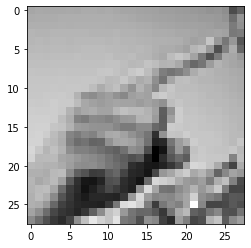

In [10]:
import matplotlib.pyplot as plt
image_data=train_df.loc[1]['pixel1':].values.astype(int)
image_matrix=image_data.reshape((28,28))
plt.imshow(image_matrix,cmap='gray')
plt.show()

In [11]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [12]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [13]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


## Converting the integer labels to binary form

In [14]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [15]:
y_train


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [16]:
X_test=X_test.values.reshape(-1,28,28,1)

In [17]:
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

In [18]:
print(X_train_rgb.shape,y_train.shape,X_test_rgb.shape,y_test.shape)

(27455, 28, 28, 3) (27455, 24) (7172, 28, 28, 3) (7172, 24)


## Augmenting the image dataset to generate new data

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test_rgb/255

## Visualization of the Dataset

Text(0.5, 1.0, 'label: 13  letter: M')

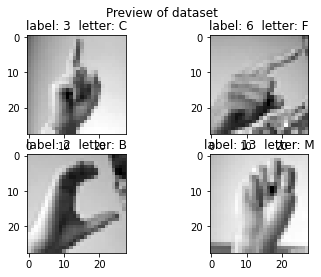

In [20]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

## Frequency plot of the labels

C:\Users\Dell\Documents\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of each label')

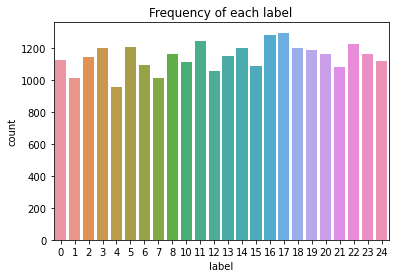

In [21]:
sns.countplot(train_label)
plt.title("Frequency of each label")

## Building the CNN Mode
The model consist of :

Three convolution layer each followed bt MaxPooling for better feature capture
A dense layer of 512 units
The output layer with 24 units for 24 different classes


Convolution layers

Conv layer 1 -- UNITS - 128 KERNEL SIZE - 5 * 5 STRIDE LENGTH - 1 ACTIVATION - ReLu

Conv layer 2 -- UNITS - 64 KERNEL SIZE - 3 * 3 STRIDE LENGTH - 1 ACTIVATION - ReLu

Conv layer 3 -- UNITS - 32 KERNEL SIZE - 2 * 2 STRIDE LENGTH - 1 ACTIVATION - ReLu

MaxPool layer 1 -- MAX POOL WINDOW - 3 * 3 STRIDE - 2

MaxPool layer 2 -- MAX POOL WINDOW - 2 * 2 STRIDE - 2

MaxPool layer 3 -- MAX POOL WINDOW - 2 * 2 STRIDE - 2

In [22]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
model = Sequential()
#First Convolution Layer
#Learning a total of 64 filters , which is then downsampled by maxpooling layer (2x2)
#kernel_size 3x3 : specifying height and width of 2D convolution window
#padding same: spatial dimensions such that: output value size matches the input volume size
#Relu: activation function used
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Second Convolution Layer
model.add(Conv2D(128, (3, 3), padding='same', input_shape=(28, 28, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Third Convolution Layer
model.add(Conv2D(256, (3, 3), padding='same', input_shape=(28, 28, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#Batch normalization  allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.
#Flattening : converting 2d array into single long continuous vector
#Dropouts used to avoid overfitting
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))


C:\Users\Dell\Documents\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Dense and output layers

In [23]:
#Dense layers produce the output = activation(dot(input, kernel) + bias)
#Used to predict labels
#Softmax activation function used for output labels
classes = 24
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,360,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          24,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,756,760 (10.52 MB)

 Trainable params: 2,756,248 (10.51 MB)

 Non-trainable params: 512 (2.00 KB)

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Training the model

In [25]:
model.fit(train_datagen.flow(X_train_rgb,y_train,batch_size=64),
         epochs = 15,
          validation_data=(X_test_rgb,y_test),
          shuffle=1
         )

Epoch 1/15


C:\Users\Dell\Documents\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


429/429 ━━━━━━━━━━━━━━━━━━━━ 98s 215ms/step - accuracy: 0.2848 - loss: 2.3419 - val_accuracy: 0.3454 - val_loss: 2.4170
Epoch 2/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 97s 223ms/step - accuracy: 0.7050 - loss: 0.8769 - val_accuracy: 0.5807 - val_loss: 1.8330
Epoch 3/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 67s 153ms/step - accuracy: 0.8104 - loss: 0.5510 - val_accuracy: 0.6156 - val_loss: 1.3893
Epoch 4/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 64s 147ms/step - accuracy: 0.8738 - loss: 0.3696 - val_accuracy: 0.6279 - val_loss: 1.4225
Epoch 5/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 63s 146ms/step - accuracy: 0.8997 - loss: 0.2907 - val_accuracy: 0.6581 - val_loss: 1.2578
Epoch 6/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 63s 146ms/step - accuracy: 0.9156 - loss: 0.2530 - val_accuracy: 0.7737 - val_loss: 0.6854
Epoch 7/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 61s 142ms/step - accuracy: 0.9310 - loss: 0.2077 - val_accuracy: 0.7175 - val_loss: 0.9267
Epoch 8/15
429/429 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - accuracy: 0.9402 - loss: 0.1786 - val

## Evaluating the model



In [26]:
(ls,acc)=model.evaluate(x=X_test_rgb,y=y_test)


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8540 - loss: 0.5804


In [27]:
print('MODEL ACCURACY = {}%'.format(acc*100))


MODEL ACCURACY = 85.88957190513611%


In [28]:
predictions=model.predict(X_test_rgb)

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step


In [29]:
predictions

array([[1.5370345e-08, 1.3091583e-11, 6.5888673e-02, ..., 2.1880691e-16,
        2.5882176e-04, 2.2847160e-09],
       [2.1040551e-08, 1.6484005e-09, 7.0869879e-11, ..., 6.6887234e-09,
        1.8061731e-11, 1.2509541e-07],
       [1.8680192e-13, 2.6783453e-14, 1.4235849e-10, ..., 2.1411801e-09,
        9.6197342e-11, 7.7773798e-08],
       ...,
       [2.6046203e-09, 1.0894037e-13, 9.9205983e-01, ..., 1.7088088e-18,
        2.5812166e-10, 5.9613847e-10],
       [1.5254618e-05, 3.4000914e-07, 7.7937524e-11, ..., 3.6820303e-13,
        3.6048924e-11, 6.5349481e-09],
       [1.6419665e-09, 6.4219063e-14, 9.9422789e-01, ..., 1.9112674e-18,
        4.1146087e-10, 6.2812505e-10]], dtype=float32)

In [30]:
predicted_sign=str(predictions)
predicted_sign

'[[1.5370345e-08 1.3091583e-11 6.5888673e-02 ... 2.1880691e-16\n  2.5882176e-04 2.2847160e-09]\n [2.1040551e-08 1.6484005e-09 7.0869879e-11 ... 6.6887234e-09\n  1.8061731e-11 1.2509541e-07]\n [1.8680192e-13 2.6783453e-14 1.4235849e-10 ... 2.1411801e-09\n  9.6197342e-11 7.7773798e-08]\n ...\n [2.6046203e-09 1.0894037e-13 9.9205983e-01 ... 1.7088088e-18\n  2.5812166e-10 5.9613847e-10]\n [1.5254618e-05 3.4000914e-07 7.7937524e-11 ... 3.6820303e-13\n  3.6048924e-11 6.5349481e-09]\n [1.6419665e-09 6.4219063e-14 9.9422789e-01 ... 1.9112674e-18\n  4.1146087e-10 6.2812505e-10]]'

In [31]:
import tensorflow as tf

In [32]:
#tf.saved_model.save('keras_model.kears','D:/Sign Detection/test/')
#keras_model.save('D:/Sign Detection/test/')
import tensorflow as tf
from tensorflow import keras

# Assuming keras_model is your Keras model
keras_model = keras.models.load_model('keras_model.h5')

# Specify the export directory
export_dir = 'D:/Sign Detection/model'

# Save the model
tf.saved_model.save(keras_model, export_dir)


INFO:tensorflow:Assets written to: D:/Sign Detection/model\assets


INFO:tensorflow:Assets written to: D:/Sign Detection/model\assets


In [33]:
''keras_model.save('D:/Sign Detection/t/.h5')''

SyntaxError: invalid syntax (650009841.py, line 1)

In [ ]:
''''# Define function to predict sign from image
def predict_sign(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28, 28))
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    sign_label = chr(ord('A') + np.argmax(prediction))  # Convert index to letter
    return sign_label

# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform sign detection
    sign = predict_sign(frame)

    # Display sign label on the frame
    cv2.putText(frame, sign, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('Sign Detection', frame)

    # Check for 'q' key to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()
''''